# Are Left Footed Football (Soccer) Players Better? Data Analysis with Python

This Notebook contains the code for the Medium blog post.

-------

### Table of Contents (click to navigate)
#### [1. Data Preparation](#1)
#### [2. Proportion of Left Footed Players](#2)
#### [3. Proportion of Position](#3)
#### [4. Comparison by Nationality](#4)
#### [5. Comparison by League](#5)
#### [6. Comparison by Club Team](#6)

-----

### Data Preparation
<a id=1 a>

First let's prepare our data.

The dataset contains 110 attributes for almost 20,000 licenced football players.

The attributes of interest are:

* <b>short_name</b>: This is simply the players name
* <b>nationality_name</b>: This is the players nationality
* <b>preferred_foot</b>: This is whether the player is left or right footed
* <b>player_positions</b>: This contains the positions the player can play in i.e. central midfield, left midfield etc. A player can play in multiple positions but the field populates data in order of their best position 
* <b>league_name</b>: This is the players current league i.e. Premier League
* <b>club_name</b>: This is the club that the player currently plays for i.e. Arsenal FC

In [1]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#options and settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)


In [2]:
players = pd.read_csv("players_22.csv", low_memory=False)

In [3]:
#this returns the total number of players and the number of attributes
players.shape

(19239, 110)

In [4]:
#selecting the relevant columns only
columns = ['short_name', 'nationality_name', 'preferred_foot', 'player_positions','league_name','club_name','overall']

players = players[columns]

In [5]:
#ensuring appropriate data types
players['short_name'] = players['short_name'].astype(str)
players['nationality_name'] = players['nationality_name'].astype(str)
players['preferred_foot'] = players['preferred_foot'].astype(str)
players['player_positions'] = players['player_positions'].astype(str)
players['league_name'] = players['league_name'].astype(str)

In [6]:
players.head(5)

,short_name,nationality_name,preferred_foot,player_positions,league_name,club_name,overall
0,L. Messi,Argentina,Left,"RW, ST, CF",French Ligue 1,Paris Saint-Germain,93
1,R. Lewandowski,Poland,Right,ST,German 1. Bundesliga,FC Bayern München,92
2,Cristiano Ronaldo,Portugal,Right,"ST, LW",English Premier League,Manchester United,91
3,Neymar Jr,Brazil,Right,"LW, CAM",French Ligue 1,Paris Saint-Germain,91
4,K. De Bruyne,Belgium,Right,"CM, CAM",English Premier League,Manchester City,91


In [7]:
#selecting the primary position for each player in the 'player_position' column
players['player_positions']=players['player_positions'].str.split(',').str[0]
players.head(2)

,short_name,nationality_name,preferred_foot,player_positions,league_name,club_name,overall
0,L. Messi,Argentina,Left,RW,French Ligue 1,Paris Saint-Germain,93
1,R. Lewandowski,Poland,Right,ST,German 1. Bundesliga,FC Bayern München,92


In [8]:
#returning an array of all positions in the dataset
players['player_positions'].unique()

array(['RW', 'ST', 'LW', 'CM', 'GK', 'CDM', 'CF', 'LM', 'CB', 'CAM', 'LB',
       'RB', 'RM', 'LWB', 'RWB'], dtype=object)

The players playing in the positions LB, RB, LWB, RWB and GK are to be removed from our analysis (refer to blog post)

In [9]:
#creating a variable to store the total players in the dataframe pre filter
total_player_count = len(players)

#filtering the dataframe to exclude specific player positions
players = players[players['player_positions'].str.contains('GK|LB|RB|LWB|RWB')==False]

#creating a variable to store the total players in the dataframe post filter
filtered_player_count = len(players)

#listing the number of players filtered out and the remaining positions
print(f"{total_player_count - filtered_player_count} players have been removed") # make this an f string
print('\n')
print(f"Players playing in these positions are retained: {players['player_positions'].unique()}")


5187 players have been removed


Players playing in these positions are retained: ['RW' 'ST' 'LW' 'CM' 'CDM' 'CF' 'LM' 'CB' 'CAM' 'RM']


-------------

### Proportion of Left Footed Players
<a id=2 a>

Let's perform some analysis to get an idea of the percentage of left footed players in our filtered dataset

In [10]:
#creating a new dataframe that counts the occurence of each preferred foot (left or right)
count_left_right = \
players[['preferred_foot','overall']].\
groupby(by='preferred_foot').count().\
reset_index().\
rename(columns={"overall":"count"})

#creating a new total column storing the total number of players
count_left_right['total'] = count_left_right["count"].sum()

#creating a new column showing the percentage of total for each record
count_left_right['percentage_of_total'] = round(count_left_right['count']/count_left_right['total']*100,1)

#displaying the dataframe
count_left_right


,preferred_foot,count,total,percentage_of_total
0,Left,2907,14052,20.7
1,Right,11145,14052,79.3


Text(0.5, 0.32, 'The reference line is at 20% which is the best estimate from sources for the percentage of left-footers in total population')

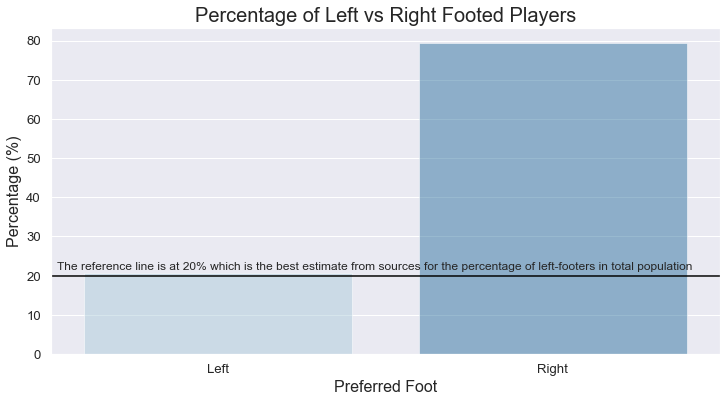

In [11]:
#seaborn bar chart showing the percentage of left and right footed players as a proportion of the population
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.set(font_scale = 1.2)
g = sns.barplot(data=count_left_right, x=count_left_right['preferred_foot'],y=count_left_right['percentage_of_total'], palette='Paired', alpha=0.5)
g.axhline(20, color='black')
g.set_title('Percentage of Left vs Right Footed Players', fontsize=20)
g.set_ylabel("Percentage (%)", fontsize=16)
g.set_xlabel("Preferred Foot", fontsize=16)
txt="The reference line is at 20% which is the best estimate from sources for the percentage of left-footers in total population"
plt.figtext(0.5, 0.32, txt, wrap=True, horizontalalignment='center', fontsize=12)


-------

### Comparision by Position Played
<a id=3 a>

Let's perform some analysis to get an idea of the playing positions that favour left-footed players

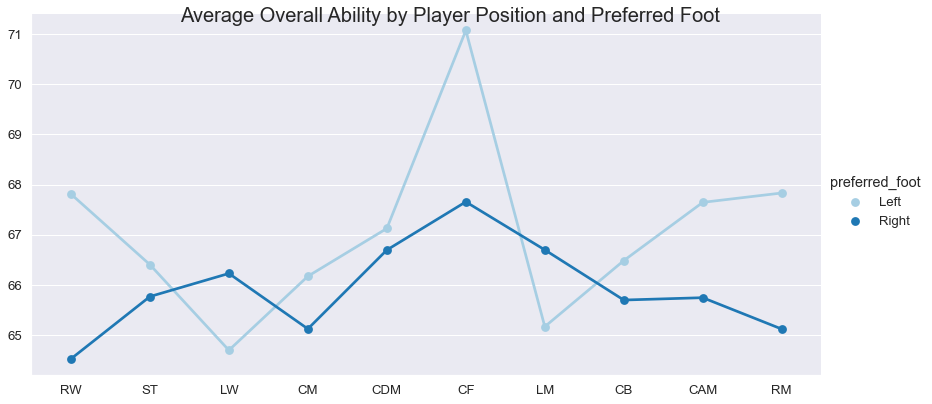

In [12]:
#point plot showing the average overall ability for players in each position split by preferred foot
sns.set(font_scale = 1.2)

g = sns.catplot(
    data=players, \
    x="player_positions", \
    y="overall", \
    hue="preferred_foot", \
    palette="Paired", \
    ci=None,
    kind="point", \
    height=6, \
    aspect=2, \
    alpha=0.5)

g.fig.suptitle('Average Overall Ability by Player Position and Preferred Foot', fontsize=20 )

g.set(xlabel='', ylabel='')


-----------

### Comparison by Nationality
<a id=4 a>

Let's perform some analysis to get an idea of the nationalities that favour left-footed players

In [13]:
#creating a variable to store the total number of players for each nationality
#retaining only top 10 nationalities by count descending
count_by_nationality = \
players.groupby(by='nationality_name').\
count()['short_name'].\
reset_index().\
sort_values('short_name', ascending=False).\
head(10)

#renaming the columns
count_by_nationality = \
count_by_nationality.\
rename(columns={"nationality_name": "Nationality of Player", "short_name": "Number of Players"})

#displaying the dataframe
count_by_nationality.style.hide(axis='index')


Nationality of Player,Number of Players
England,1225
Germany,872
Spain,780
Argentina,737
France,735
Brazil,685
Japan,402
Netherlands,305
Sweden,284
Poland,283


In [14]:
#creating a variable to store the data from players dataframe filtered by top 10 nationalities
nationality_analysis = \
players[players['nationality_name'].\
str.contains('England|Germany|Spain|Argentina|France|Brazil|Japan|Netherlands|Sweden|Poland')==True]

#pivoting the resulting dataframe to create a matrix 
#each row stores the grouped nationality
#there is a column for left and right
#the values store the average overall score
nationality_analysis = \
nationality_analysis.\
pivot_table(index='nationality_name', columns='preferred_foot', values='overall', aggfunc='mean')


#creating a new column flagging nationalities where left footed players are dominant
nationality_analysis['Left Dominant'] = nationality_analysis['Left']> nationality_analysis['Right']

#creating a new column flagging nationalities where right footed players are dominant
nationality_analysis['Right Dominant'] = nationality_analysis['Right']> nationality_analysis['Left']

#removing columns 
nationality_analysis = nationality_analysis[['Left Dominant', 'Right Dominant']]


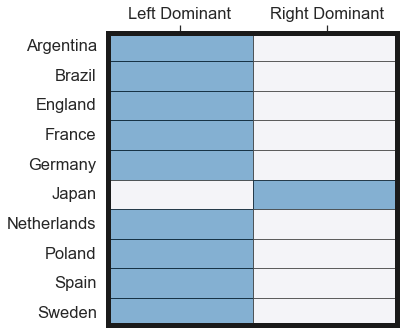

In [15]:
plt.figure(figsize=(6,5), tight_layout=True)
custom_palette = sns.color_palette("Paired")
sns.set(font_scale = 1.5)

#creating the seaborn heatmap to show nationalities containing left or right dominant players
ax = sns.heatmap(nationality_analysis, linewidth=1, linecolor='black', cbar=False, cmap=['white',custom_palette[1]], alpha=0.5)

ax.xaxis.tick_top()
ax.set(xlabel='', ylabel='')
ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=10, color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=2, color='k',linewidth=10)


---------

### Comparison by League
<a id=5 a>

Let's perform some analysis to get an idea of the professional leagues that favour left-footed players

In [16]:
#pivoting the players dataframe to create a matrix 
#each row stores the grouped league name
#there is a column for left and right foot
#the values store the average overall score
league_analysis = \
players.\
pivot_table(index='league_name', columns='preferred_foot', values='overall', aggfunc='mean').\
reset_index()

#creating a new column showing the difference in average overall score for left and right footed players
league_analysis['difference'] = league_analysis['Left'] - league_analysis['Right']

#creating a new column flagging if the league favours left or right footed players
league_analysis['left_vs_right'] = \
league_analysis['difference'].\
apply(lambda x: 'Left Footed' if x >0 else 'Right Footed')


Text(0.5, 0, '')

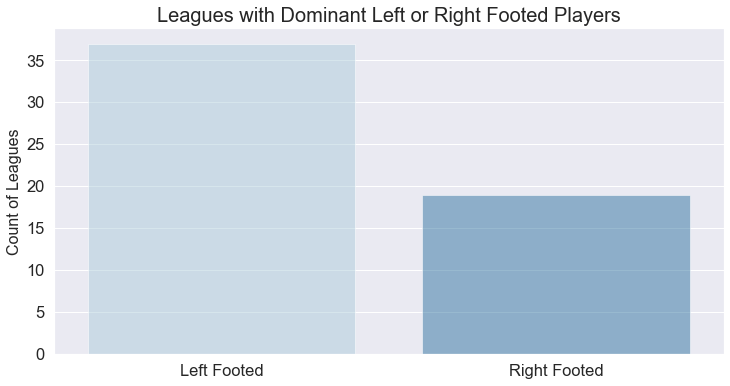

In [17]:
plt.figure(figsize=(12,6))

#creating the seaborn countplot
g = sns.countplot(x=league_analysis['left_vs_right'], palette='Paired', order = league_analysis['left_vs_right'].value_counts().index, alpha=0.5)
g.set_title('Leagues with Dominant Left or Right Footed Players', fontsize=20)
g.set_ylabel("Count of Leagues", fontsize=16)
g.set_xlabel("", fontsize=16)


--------

### Comparison by Club Team (top 5 European Leagues only)
<a id=6 a>

Let's perform some analysis to get an idea of the teams that favour left-footed players

In [18]:
#creating a new dataframe filtering the players dataframe for only the top 5 european leagues
club_analysis = \
players[players['league_name'].\
str.\
contains('French Ligue 1|German 1. Bundesliga|English Premier League|Spain Primera Division|Italian Serie A')]

In [19]:
club_analysis.head(5).style.hide(axis='index')

short_name,nationality_name,preferred_foot,player_positions,league_name,club_name,overall
L. Messi,Argentina,Left,RW,French Ligue 1,Paris Saint-Germain,93
R. Lewandowski,Poland,Right,ST,German 1. Bundesliga,FC Bayern München,92
Cristiano Ronaldo,Portugal,Right,ST,English Premier League,Manchester United,91
Neymar Jr,Brazil,Right,LW,French Ligue 1,Paris Saint-Germain,91
K. De Bruyne,Belgium,Right,CM,English Premier League,Manchester City,91


In [20]:
#pivoting the dataframe to create a matrix 
#each row stores the grouped club name
#there is a column for left and right foot
#the values store the average overall score
club_analysis = \
club_analysis.\
pivot_table(index='club_name', columns='preferred_foot', values='overall', aggfunc='mean').\
reset_index()

In [21]:
club_analysis.head(5).style.hide(axis='index')

club_name,Left,Right
1. FC Köln,73.200000,69.117647
1. FC Union Berlin,71.000000,70.500000
1. FSV Mainz 05,73.200000,67.166667
AC Milan,78.400000,76.357143
AS Monaco,74.750000,75.235294


In [22]:
#creating a new column showing the difference between left and right footed players overall average score across clubs
club_analysis['difference'] = club_analysis['Left'] - club_analysis['Right']

In [23]:
#creating a new column flagging if the club favours left or right footed players
club_analysis['left_vs_right'] = \
club_analysis['difference'].apply(lambda x: 'Left Footed' if x >0 else 'Right Footed')


In [24]:
#displaying the top 10 clubs favouring left footed players with highest difference in overall score in favour of lefties
club_analysis[['club_name','difference']].\
sort_values(by='difference', ascending=False).head(10).style.hide(axis='index')


club_name,difference
Aston Villa,7.403361
Arsenal,7.333333
Cádiz CF,6.681818
1. FSV Mainz 05,6.033333
Southampton,5.863636
Atlético de Madrid,5.618421
Paris Saint-Germain,5.311111
RC Strasbourg Alsace,5.150000
Everton,4.492754
1. FC Köln,4.082353
